## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [ ]:
dataset = pd.read_csv('data.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
X

array([[2.44310666e-02, 3.46867279e+02, 3.31874633e+02, ...,
        1.02878163e+00, 2.93200000e+02, 3.50014529e+02],
       [2.50162993e-02, 3.42013221e+02, 3.34982669e+02, ...,
        1.00329503e+00, 2.93200000e+02, 3.49904450e+02],
       [2.53664919e-02, 3.44491549e+02, 3.32124375e+02, ...,
        9.87497359e-01, 2.93200000e+02, 3.50088297e+02],
       ...,
       [2.47476565e-02, 3.49774604e+02, 3.28797109e+02, ...,
        1.01380080e+00, 2.93200000e+02, 3.49964777e+02],
       [2.49302356e-02, 3.57088832e+02, 3.30851358e+02, ...,
        1.00447033e+00, 2.93200000e+02, 3.50021956e+02],
       [2.49185950e-02, 3.47881562e+02, 3.30365879e+02, ...,
        1.00634565e+00, 2.93200000e+02, 3.49977713e+02]])

#Removing Outliers

In [ ]:
from scipy.stats import zscore
#Z-score tells us how many standard deviations above or below the mean a datapoint lies. It assumes that the datapoints follow a gaussian distribution[1].

#From the above normal distribtion figure we can we that:

#68% of the data lies within 1 standard deviation.
#95% of the data lies within 2 standard deviations.
#99.7% of the data lies within 3 standard deviations.
#Since majority of the datapoints (99.7%) lie within 3 standard deviations above or below the mean, any Z-score more than +3 or any Z-score less than -3 is considered as an outlier.
# Calculate Z-scores for each data point
z_scores = zscore(X)
# Define a threshold for identifying outliers
threshold = 3
# Identify outliers
outliers = (z_scores > threshold) | (z_scores < -threshold)

##Feature Selection

In [ ]:
from sklearn.feature_selection import RFE
estimator=LinearRegression()
sel = RFE(estimator=estimator,n_features_to_select=2, step=1)
sel = sel.fit_transform(X, y)
print (sel)

[[0.02443107 1.02878163]
 [0.0250163  1.00329503]
 [0.02536649 0.98749736]
 ...
 [0.02474766 1.0138008 ]
 [0.02493024 1.00447033]
 [0.0249186  1.00634565]]


## Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(sel, y, test_size = 0.3, random_state = 1)
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size = 0.3, random_state = 1)

##Linear Regression

In [ ]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
# Calculate AIC
n = len(y_train)
p = X_train.shape[1] + 1  # Number of parameters (including intercept)
aic = n * np.log(mse) + 2 * p

print(f"AIC: {aic}")

# Print the coefficients and intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
r2_score(y_test,y_pred)

Mean Squared Error: 3.726761654178907e-05
AIC: -61178.314785823335
Coefficients: [223.69190701   6.23043635]
Intercept: -5.800010571225538


0.7590920922526123

#Visualising results for multiple subsets

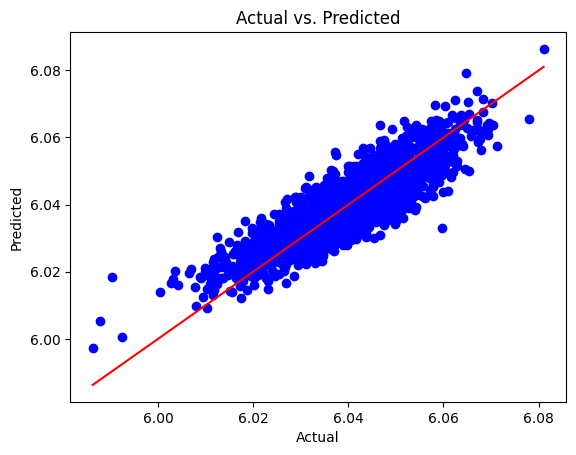

In [ ]:
import matplotlib.pyplot as plt

# Plot the actual test cases vs. the predictions
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Plot the y=x line for reference
plt.title('Actual vs. Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()


##Polynomial Regression

In [ ]:

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Fit the polynomial regression model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Predict on the test set
y_pred1 = model.predict(X_test_poly)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
n = len(y_train)
p = X_train.shape[1] + 1  # Number of parameters (including intercept)
aic = n * np.log(mse) + 2 * p

print(f"AIC: {aic}")


r2_score(y_test,y_pred)


Mean Squared Error: 3.726761654178907e-05
AIC: -42823.02035007634


0.7590920922526123

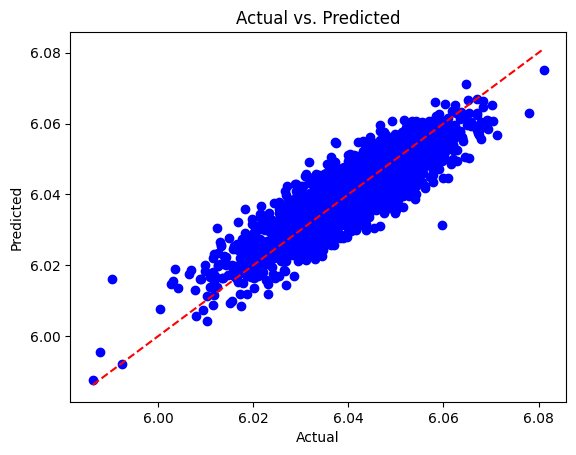

In [ ]:
import matplotlib.pyplot as plt

# Plot the actual test cases vs. the predictions
plt.scatter(y_test, y_pred1, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Plot the y=x line for reference
plt.title('Actual vs. Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()


## Applying PCA

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components =  4)#max accuracy point
X_train1 = pca.fit_transform(X_train1)
X_test1 = pca.transform(X_test1)

## Training the Linear Regression model on the Training set

In [ ]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

model = LinearRegression()
model.fit(X_train1, y_train)

# Predict on the test set
y_pred = model.predict(X_test1)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Print the coefficients and intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

n = len(y_train)
p = X_train.shape[1] + 1  # Number of parameters (including intercept)
aic = n * np.log(mse) + 2 * p

print(f"AIC: {aic}")

r2_score(y_test,y_pred)

Mean Squared Error: 2.1107854969007497e-05
Coefficients: [ 1.02802240e+02 -3.93313771e-05 -8.84973937e-06 -5.25112382e-07
  3.35969893e+00  1.85848710e-03 -6.35570582e-02]
Intercept: 21.81895893315459
AIC: -45210.63431605374


0.8635531421249624

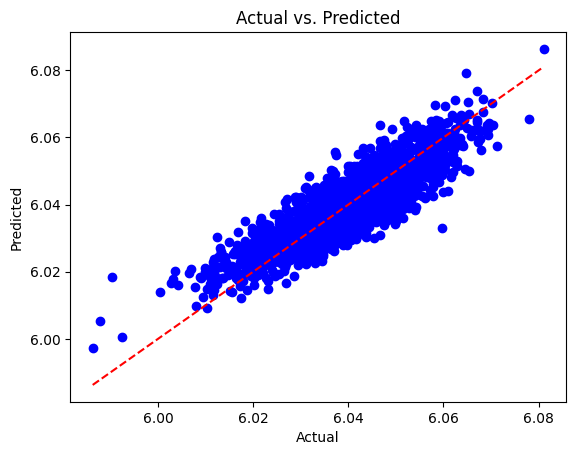

In [ ]:
import matplotlib.pyplot as plt

# Plot the actual test cases vs. the predictions
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Plot the y=x line for reference
plt.title('Actual vs. Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()


#Polynomial Regression on PCA

In [ ]:

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train1)
X_test_poly = poly.transform(X_test1)

# Fit the polynomial regression model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Predict on the test set
y_pred1 = model.predict(X_test_poly)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
n = len(y_train)
p = X_train.shape[1] + 1  # Number of parameters (including intercept)
aic = n * np.log(mse) + 2 * p

print(f"AIC: {aic}")


r2_score(y_test,y_pred1)


Mean Squared Error: 2.1107854969007497e-05
AIC: -45210.63431605374


0.8685903868061529

## Visualising the Regression results

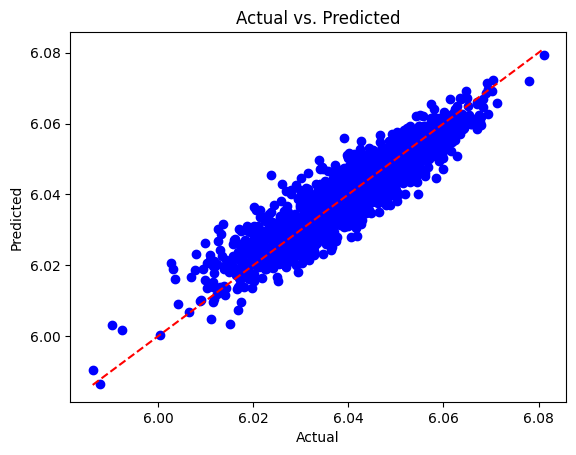

In [ ]:
import matplotlib.pyplot as plt

# Plot the actual test cases vs. the predictions
plt.scatter(y_test, y_pred1, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Plot the y=x line for reference
plt.title('Actual vs. Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()


#Using Lasso Techinique

In [ ]:

from sklearn.linear_model import Lasso


 # Regularization strength
model = Lasso(alpha=0.01)
model.fit(X_train1, y_train1)

# Predict on the test set
y_pred = model.predict(X_test1)

# Evaluate the model
mse = mean_squared_error(y_test1, y_pred)
print(f"Mean Squared Error: {mse}")

n = len(y_train1)
p = X_train1.shape[1] + 1  # Number of parameters (including intercept)
aic = n * np.log(mse) + 2 * p

print(f"AIC: {aic}")


r2_score(y_test1,y_pred)


Mean Squared Error: 0.00015475773303572454
AIC: -36833.32864128485


-0.0003956553422073128

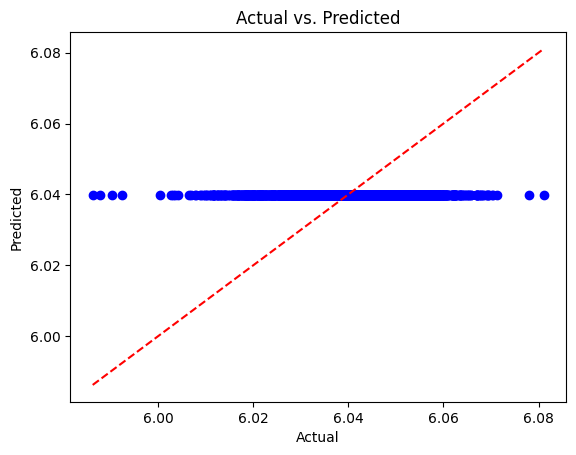

In [ ]:
import matplotlib.pyplot as plt

# Plot the actual test cases vs. the predictions
plt.scatter(y_test1, y_pred, color='blue')
plt.plot([min(y_test1), max(y_test1)], [min(y_test1), max(y_test1)], color='red', linestyle='--')  # Plot the y=x line for reference
plt.title('Actual vs. Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()


## Part 2 - Building the ANN single layered

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
import tensorflow as tf
from tensorflow import keras


# Define the ANN model
model = keras.Sequential([
    keras.layers.Dense(5, activation='relu'),
    keras.layers.Dense(1, activation='linear')
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

# Evaluate the model
loss, mae, mse = model.evaluate(X_test, y_test)
print(f'Test Mean Squared Error: {mse}')


Epoch 1/100
132/132 [==============================] - 1s 3ms/step - loss: 31.6328 - mae: 5.6119 - mse: 31.6328 - val_loss: 28.1324 - val_mae: 5.2832 - val_mse: 28.1324
Epoch 2/100
132/132 [==============================] - 0s 2ms/step - loss: 24.7229 - mae: 4.9316 - mse: 24.7229 - val_loss: 20.8061 - val_mae: 4.5015 - val_mse: 20.8061
Epoch 3/100
132/132 [==============================] - 0s 2ms/step - loss: 17.5700 - mae: 4.0984 - mse: 17.5700 - val_loss: 13.8590 - val_mae: 3.5858 - val_mse: 13.8590
Epoch 4/100
132/132 [==============================] - 0s 2ms/step - loss: 11.4490 - mae: 3.2045 - mse: 11.4490 - val_loss: 8.7331 - val_mae: 2.7308 - val_mse: 8.7331
Epoch 5/100
132/132 [==============================] - 0s 3ms/step - loss: 7.3252 - mae: 2.4790 - mse: 7.3252 - val_loss: 5.8033 - val_mae: 2.1750 - val_mse: 5.8033
Epoch 6/100
132/132 [==============================] - 0s 3ms/step - loss: 4.9928 - mae: 2.0132 - mse: 4.9928 - val_loss: 4.2322 - val_mae: 1.8362 - val_mse: 4.2

In [ ]:
y_pred = model.predict(X_test)
from sklearn.metrics import r2_score
n = len(y_train)
p = X_train.shape[1] + 1  # Number of parameters (including intercept)
aic = n * np.log(mse) + 2 * p

print(f"AIC: {aic}")

r2_score(y_test, y_pred)

57/57 [==============================] - 0s 2ms/step
AIC: -42500.88312847685


0.7398871354836924

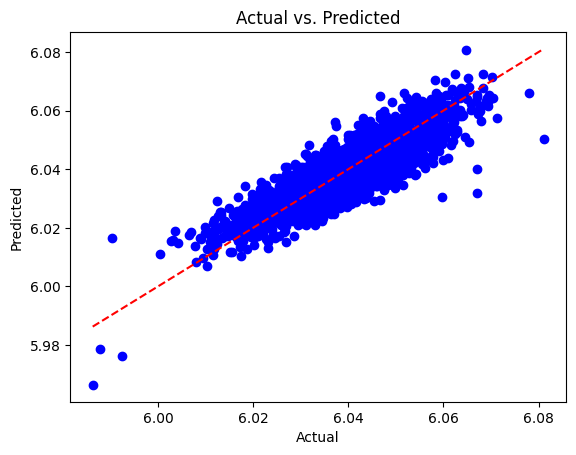

In [ ]:
import matplotlib.pyplot as plt

# Plot the actual test cases vs. the predictions
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Plot the y=x line for reference
plt.title('Actual vs. Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()


## Implementing ANN for multiple hidden layers

In [ ]:



# Define the ANN model
model2 = keras.Sequential([
    keras.layers.Dense(5, activation='relu'),keras.layers.Dense(10, activation='relu'),keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(1, activation='linear')
])

# Compile the model
model2.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse'])

# Train the model
history2 = model2.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

# Evaluate the model
loss, mae, mse = model.evaluate(X_test, y_test)
print(f'Test Mean Squared Error: {mse}')


Epoch 1/100
132/132 [==============================] - 2s 6ms/step - loss: 20.8362 - mae: 4.3346 - mse: 20.8362 - val_loss: 6.0523 - val_mae: 2.1529 - val_mse: 6.0523
Epoch 2/100
132/132 [==============================] - 0s 4ms/step - loss: 3.7280 - mae: 1.6349 - mse: 3.7280 - val_loss: 2.0926 - val_mae: 1.2187 - val_mse: 2.0926
Epoch 3/100
132/132 [==============================] - 1s 4ms/step - loss: 1.0128 - mae: 0.7969 - mse: 1.0128 - val_loss: 0.4937 - val_mae: 0.5115 - val_mse: 0.4937
Epoch 4/100
132/132 [==============================] - 1s 4ms/step - loss: 0.2477 - mae: 0.3724 - mse: 0.2477 - val_loss: 0.1559 - val_mae: 0.2931 - val_mse: 0.1559
Epoch 5/100
132/132 [==============================] - 0s 3ms/step - loss: 0.0931 - mae: 0.2273 - mse: 0.0931 - val_loss: 0.0724 - val_mae: 0.2017 - val_mse: 0.0724
Epoch 6/100
132/132 [==============================] - 0s 2ms/step - loss: 0.0502 - mae: 0.1674 - mse: 0.0502 - val_loss: 0.0439 - val_mae: 0.1593 - val_mse: 0.0439
Epoch 7/

In [ ]:
y_pred = model2.predict(X_test)
from sklearn.metrics import r2_score
n = len(y_train)
p = X_train.shape[1] + 1  # Number of parameters (including intercept)
aic = n * np.log(mse) + 2 * p

print(f"AIC: {aic}")


r2_score(y_test, y_pred)

57/57 [==============================] - 0s 2ms/step
AIC: -42500.88312847685


0.5288274281180687

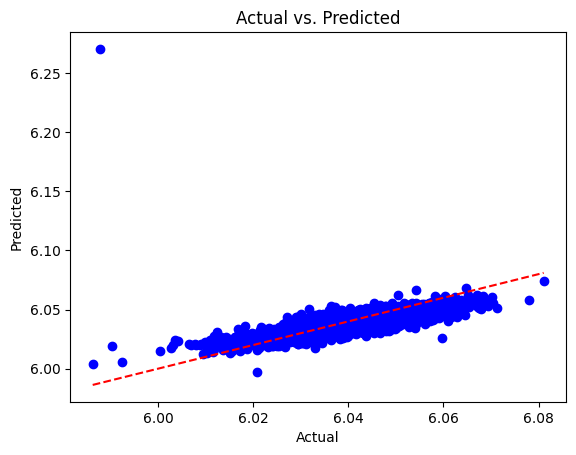

In [ ]:
import matplotlib.pyplot as plt

# Plot the actual test cases vs. the predictions
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Plot the y=x line for reference
plt.title('Actual vs. Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()


##KNN

In [ ]:

from sklearn.neighbors import NearestNeighbors

X_train, X_val, y_train, y_val = train_test_split(selector, y, test_size=0.3, random_state=42)

# Create a database including the training data
training_data = (X_train, y_train)

#  For each validation data point, use k-NN to find the k nearest neighbors
def knn_search(x_val, k):
    knn = NearestNeighbors(n_neighbors=k)
    knn.fit(X_train)
    distances, indices = knn.kneighbors([x_val])
    return indices[0]

# Build a local just-in-time neural network model using the k-NN search results
def build_local_model(X_train, y_train, indices):
    local_X_train = X_train[indices]
    local_y_train = y_train[indices]

    # Define and compile the local neural network model
    local_model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(10, activation='relu', input_shape=(X_train.shape[1],)),
        tf.keras.layers.Dense(1, activation=None)
    ])
    local_model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the local model
    local_model.fit(local_X_train, local_y_train, epochs=5, batch_size=128)

    return local_model

# Use the local model to make predictions for the current validation input
def predict_with_local_model(local_model, x_val):
    return local_model.predict(np.array([x_val]))

# Repeat the process for all validation data points
predictions = []
for x_val in X_val:
    indices = knn_search(x_val, k=3)  # Change k value as needed
    local_model = build_local_model(X_train, y_train, indices)
    prediction = predict_with_local_model(local_model, x_val)
    predictions.append(prediction)

# Convert predictions to numpy array
predictions = np.array(predictions)


Epoch 1/5
1/1 [==============================] - 2s 2s/step - loss: 2.7859
Epoch 2/5
1/1 [==============================] - 0s 27ms/step - loss: 2.7750
Epoch 3/5
1/1 [==============================] - 0s 20ms/step - loss: 2.7641
Epoch 4/5
1/1 [==============================] - 0s 17ms/step - loss: 2.7532
Epoch 5/5
1/1 [==============================] - 0s 116ms/step
Epoch 1/5
1/1 [==============================] - 1s 1s/step - loss: 0.4659
Epoch 2/5
1/1 [==============================] - 0s 12ms/step - loss: 0.4647
Epoch 3/5
1/1 [==============================] - 0s 10ms/step - loss: 0.4637
Epoch 4/5
1/1 [==============================] - 0s 10ms/step - loss: 0.4629
Epoch 5/5
1/1 [==============================] - 0s 81ms/step


KeyboardInterrupt: 

In [ ]:
y_pred = local_model.predict(X_val)
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

57/57 [==============================] - 0s 1ms/step


-234711.3880717622